In [868]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import datetime as datetime
from dateutil.relativedelta import relativedelta
import os

In [869]:
ser = pd.read_csv('byggd_serbyli.csv', sep=';', index_col=0)        #yearly data
fjol = pd.read_csv('byggd_fjolbyli.csv', sep=';', index_col=0)      #yearly data
stada = pd.read_csv('stada_rvk.csv', index_col=0).T                   #yearly data
byggt = pd.read_csv('byggdar_ibudir.csv', sep=';',header=None)      #yearly data
mann = pd.read_csv('mannfjoldi_sveita.csv',index_col=0).T          #yearly data
variables_1 = pd.read_csv('merged_variables.csv',index_col=0)         #monthly data
df = pd.read_csv('kaupskra_juni.csv', sep=';',usecols=('utgdag', 'sveitarfelag', 'postnr','kaupverd',
       'fasteignamat', 'byggar', 'einflm', 'lod_flm',
       'tegund', 'fullbuid', 'onothaefur_samningur'))                     #daily data

c:\Users\halld\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [870]:
df.head()

,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur
0,200,Kópavogsbær,2012-07-30 00:00:00,87000.0,"70850,0",1985,"780,4","1105,0",Atvinnuhusnaedi,1.0,0.0
1,220,Hafnarfjarðarkaupstaður,2011-02-28 00:00:00,36000.0,"40790,0",1983,"400,0","3000,0",Atvinnuhusnaedi,1.0,0.0
2,104,Reykjavíkurborg,2012-04-16 00:00:00,31000.0,"4679,0",1962,"310,2","565,0",Atvinnuhusnaedi,1.0,1.0
3,104,Reykjavíkurborg,2012-04-16 00:00:00,31000.0,"5516,0",1962,"310,2","565,0",Atvinnuhusnaedi,1.0,1.0
4,104,Reykjavíkurborg,2018-02-20 00:00:00,23500.0,"13200,0",1962,"71,4","565,0",Atvinnuhusnaedi,1.0,0.0


In [871]:
mann.drop('Seltjarnarnes', axis=1,inplace=True)
mann.index = pd.to_datetime(mann.index, format='%Y')
stada.index = pd.to_datetime(stada.index, format='%Y')

In [872]:
samtals = ser[1:]+fjol[1:]
samtals.columns = mann.columns
samtals.index = pd.to_datetime(samtals.index, format='%Y')

In [873]:
ser = ser[1:]
fjol = fjol[1:]
ser.columns = mann.columns + '_serbyli'
fjol.columns = mann.columns + '_fjolbyli'

In [874]:
byggingar = merge = pd.merge(ser, fjol, how='outer', left_index=True, right_index=True)
byggingar.index = pd.to_datetime(byggingar.index, format='%Y')
byggingar.head()

,Reykjavík_serbyli,Kópavogur_serbyli,Garðabær_serbyli,Hafnarfjörður_serbyli,Mosfellsbær_serbyli,Reykjavík_fjolbyli,Kópavogur_fjolbyli,Garðabær_fjolbyli,Hafnarfjörður_fjolbyli,Mosfellsbær_fjolbyli
Ár,,,,,,,,,,
2006-01-01,9644,3249,2659,2821,1547,39394,7956,1744,5853,970
2007-01-01,9820,3404,2790,3016,1669,40146,8142,1912,6594,1059
2008-01-01,10017,3541,2922,3064,1901,40542,8336,1991,6803,1150
2009-01-01,10021,3558,2927,3067,1912,40669,8347,1989,6806,1155
2010-01-01,10041,3575,2936,3068,1916,40692,8491,1990,6832,1185


In [875]:
samtals.index = pd.to_datetime(samtals.index, format='%Y')
samtals

,Reykjavík,Kópavogur,Garðabær,Hafnarfjörður,Mosfellsbær
Ár,,,,,
2006-01-01,49038,11205,4403,8674,2517
2007-01-01,49966,11546,4702,9610,2728
2008-01-01,50559,11877,4913,9867,3051
2009-01-01,50690,11905,4916,9873,3067
2010-01-01,50733,12066,4926,9900,3101
...,...,...,...,...,...
2018-01-01,53825,13965,5886,10352,4018
2019-01-01,55585,14269,6283,10445,4173
2020-01-01,56082,14643,6510,10536,4329


In [876]:
ibud_per = samtals / mann

In [877]:
merge = pd.merge(ibud_per, stada, how='outer', left_index=True, right_index=True)

In [878]:
variables_1.head()

,date,overdtryggt,verdtryggt,visitala_rvk_%,verdbolga_%
0,2006-01-01,12.5,4.15,0.5,-0.259179
1,2006-02-01,12.5,4.15,2.0,-0.259179
2,2006-03-01,12.5,4.15,1.7,1.169337
3,2006-04-01,12.5,4.30,1.2,1.070205
4,2006-05-01,13.0,4.60,-0.2,1.482423


In [879]:
merge.ffill(inplace=True)
merge.reset_index(inplace=True)
merge.rename(columns={'index':'date'}, inplace=True)
merge.head()


,date,Reykjavík,Kópavogur,Garðabær,Hafnarfjörður,Mosfellsbær,"Eigendur, skuldlaust",Eigendur m. lán,"Leigjendur, alls"
0,2006-01-01,0.426536,0.422639,0.466222,0.385545,0.351291,18.0,64.8,17.2
1,2007-01-01,0.428371,0.419473,0.492047,0.404615,0.362959,14.1,69.0,16.9
2,2008-01-01,0.425484,0.411182,0.492186,0.394112,0.372437,13.4,67.7,18.9
3,2009-01-01,0.424017,0.397151,0.474609,0.381934,0.364989,15.3,64.0,20.8
4,2010-01-01,0.428756,0.397470,0.462839,0.382048,0.362563,14.9,60.3,24.8


In [880]:
variables_1['date'] = pd.to_datetime(variables_1['date'])

In [881]:
all_variables = pd.merge(merge, variables_1, how='outer', on='date')
all_variables.sort_values('date', ascending=True, inplace=True)

In [882]:
allt = all_variables.set_index('date').interpolate()

<AxesSubplot:xlabel='date'>

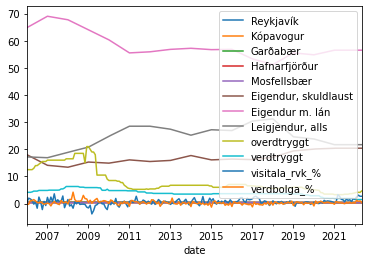

In [883]:
allt.plot()

In [884]:
allt.to_csv('independent_variables_LSTM.csv')

In [885]:
df = df[df['onothaefur_samningur'] == 0.0]
df.drop(['fullbuid', 'onothaefur_samningur'],axis = 1, inplace=True)
df = df[df['tegund'].isin(['Serbyli', 'Fjolbyli'])]
df = df[df['sveitarfelag'].isin(['Kópavogsbær', 'Hafnarfjarðarkaupstaður', 'Reykjavíkurborg', 'Mosfellsbær', 'Garðabær'])]
df.sort_values('utgdag', inplace=True)
df[['postnr', 'kaupverd']] = df[['postnr', 'kaupverd']].astype(int)
df

,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund
87193,161,Reykjavíkurborg,2006-03-01 00:00:00,11050,"17330,0",1958,"224,0","7000,0",Serbyli
39199,112,Reykjavíkurborg,2006-03-14 00:00:00,24700,"19820,0",1988,"112,3","1285,0",Fjolbyli
113092,221,Hafnarfjarðarkaupstaður,2006-03-17 00:00:00,65000,"43800,0",2003,"290,7","632,8",Serbyli
62501,111,Reykjavíkurborg,2006-04-10 00:00:00,11900,"12090,0",1972,"78,1","7940,0",Fjolbyli
108414,112,Reykjavíkurborg,2006-04-21 00:00:00,17300,"15110,0",1993,"89,0","1339,0",Fjolbyli
...,...,...,...,...,...,...,...,...,...
149443,221,Hafnarfjarðarkaupstaður,2022-05-31 00:00:00,57750,"37550,0",2017,"74,5","8446,0",Fjolbyli
126407,105,Reykjavíkurborg,2022-05-31 00:00:00,52900,"41550,0",1944,"78,1","456,0",Fjolbyli
163608,102,Reykjavíkurborg,2022-05-31 00:00:00,94900,"31550,0",2022,"114,8","8681,0",Fjolbyli
12226,111,Reykjavíkurborg,2022-05-31 00:00:00,60000,"44550,0",1975,"127,0","3978,0",Fjolbyli


<AxesSubplot:xlabel='postnr', ylabel='count'>

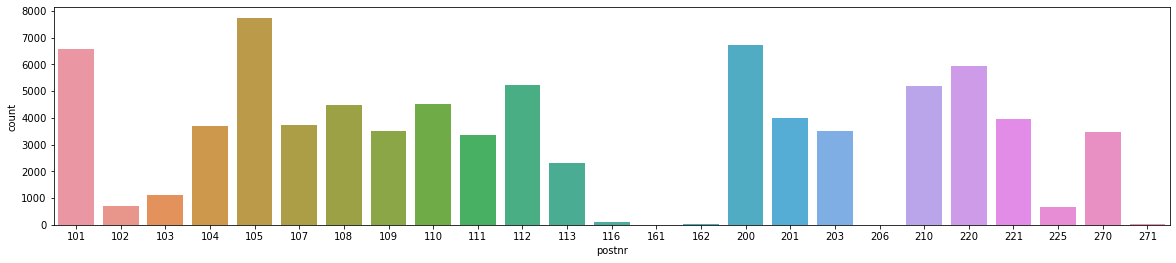

In [886]:
plt.figure(figsize=(20,4))
sns.countplot(x='postnr', data=df)

In [887]:
df = df.groupby('postnr').filter(lambda x : len(x)>100)

In [888]:
df[['fasteignamat', 'byggar', 'einflm', 'lod_flm']] = df[['fasteignamat', 'byggar', 'einflm', 'lod_flm']].replace(to_replace = ',', value = '.', regex=True)

In [889]:
df[df['byggar'].str.len() < 4]

,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund
101879,210,Garðabær,2006-05-08 00:00:00,37800,2400.0,,120.6,11410.0,Fjolbyli
54327,113,Reykjavíkurborg,2006-05-08 00:00:00,39800,5060.0,,168.3,2676.0,Serbyli
27722,221,Hafnarfjarðarkaupstaður,2006-05-09 00:00:00,34800,7740.0,,223.5,NaN,Serbyli
48110,221,Hafnarfjarðarkaupstaður,2006-05-10 00:00:00,17000,1755.0,,85.7,2897.0,Fjolbyli
104983,101,Reykjavíkurborg,2006-05-12 00:00:00,49800,2480.0,,132.1,1064.0,Fjolbyli
...,...,...,...,...,...,...,...,...,...
164991,200,Kópavogsbær,2022-05-27 00:00:00,190000,10300.0,,207.1,4049.0,Fjolbyli
151638,210,Garðabær,2022-05-27 00:00:00,103000,11650.0,,213.2,352.0,Serbyli
161017,210,Garðabær,2022-05-27 00:00:00,96500,5680.0,,120.1,4743.0,Fjolbyli
151572,200,Kópavogsbær,2022-05-27 00:00:00,180000,10250.0,,206.4,4049.0,Fjolbyli


In [890]:
df['byggar'].replace(' ', 1950, regex=True, inplace=True)
df['byggar'].replace('0', 1950, regex=True, inplace=True)
df['byggar'] = df['byggar'].astype(int)

In [891]:
df.dtypes

postnr           int32
sveitarfelag    object
utgdag          object
kaupverd         int32
fasteignamat    object
byggar           int32
einflm          object
lod_flm         object
tegund          object
dtype: object

In [892]:
df[['fasteignamat', 'einflm', 'lod_flm']] = df[['fasteignamat', 'einflm', 'lod_flm']].astype(float)

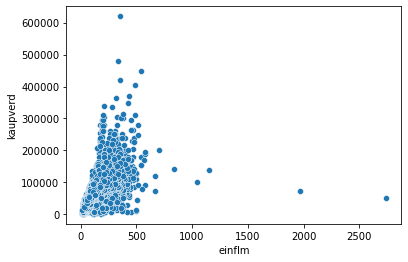

In [893]:
sns.scatterplot(data=df, x='einflm', y='kaupverd')
plt.show()

In [894]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

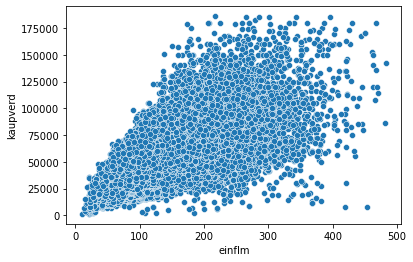

In [895]:
sns.scatterplot(data=df, x='einflm', y='kaupverd')
plt.show()

In [896]:
df['utgdag'] = df['utgdag'].str[:-4]
df['utgdag'] = pd.to_datetime(df['utgdag'])
df.sort_values('utgdag', inplace=True)
df['fmverd'] = df['kaupverd'] / df['einflm']
df['yfirverd'] = (df['kaupverd']-df['fasteignamat'])/df['fasteignamat']
df.head()

,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fmverd,yfirverd
39199,112,Reykjavíkurborg,2006-03-14,24700,19820.0,1988,112.3,1285.0,Fjolbyli,219.946572,0.246216
113092,221,Hafnarfjarðarkaupstaður,2006-03-17,65000,43800.0,1950,290.7,632.8,Serbyli,223.598211,0.484018
62501,111,Reykjavíkurborg,2006-04-10,11900,12090.0,1972,78.1,7940.0,Fjolbyli,152.368758,-0.015715
108414,112,Reykjavíkurborg,2006-04-21,17300,15110.0,1993,89.0,1339.0,Fjolbyli,194.382022,0.144937
124852,107,Reykjavíkurborg,2006-04-25,19200,14725.0,1956,88.3,6106.0,Fjolbyli,217.440544,0.303905


In [897]:
df.reset_index(inplace=True)
df['index'] = df[df['index'] != 62718] #outlier
df.drop('index', axis=1, inplace=True)
df.head()

,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fmverd,yfirverd
0,112,Reykjavíkurborg,2006-03-14,24700,19820.0,1988,112.3,1285.0,Fjolbyli,219.946572,0.246216
1,221,Hafnarfjarðarkaupstaður,2006-03-17,65000,43800.0,1950,290.7,632.8,Serbyli,223.598211,0.484018
2,111,Reykjavíkurborg,2006-04-10,11900,12090.0,1972,78.1,7940.0,Fjolbyli,152.368758,-0.015715
3,112,Reykjavíkurborg,2006-04-21,17300,15110.0,1993,89.0,1339.0,Fjolbyli,194.382022,0.144937
4,107,Reykjavíkurborg,2006-04-25,19200,14725.0,1956,88.3,6106.0,Fjolbyli,217.440544,0.303905


In [898]:
serbyli = df[df['tegund'] == 'Serbyli']
fjolbyli = df[df['tegund'] == 'Fjolbyli']

In [899]:
df_dummies = pd.get_dummies(df)

In [900]:
df_weeks = df[['utgdag', 'kaupverd', 'fasteignamat', 'einflm', 'lod_flm', 'fmverd', 'yfirverd', 'tegund']].resample('W', on='utgdag').mean()
df_months = df[['utgdag', 'kaupverd', 'fasteignamat', 'einflm', 'lod_flm', 'fmverd', 'yfirverd', 'tegund']].resample('M', on='utgdag').mean()
serbyli_months = serbyli[['utgdag', 'kaupverd', 'fasteignamat', 'einflm', 'lod_flm', 'fmverd', 'yfirverd']].resample('M', on='utgdag').mean()
fjolbyli_months = fjolbyli[['utgdag', 'kaupverd', 'fasteignamat', 'einflm', 'lod_flm', 'fmverd', 'yfirverd']].resample('M', on='utgdag').mean()

In [901]:
serbyli_count.head()

,count
utgdag,
2006-03-31,1
2006-04-30,0
2006-05-31,52
2006-06-30,50
2006-07-31,39


In [902]:
df_dummies.columns

Index(['postnr', 'utgdag', 'kaupverd', 'fasteignamat', 'byggar', 'einflm',
       'lod_flm', 'fmverd', 'yfirverd', 'sveitarfelag_Garðabær',
       'sveitarfelag_Hafnarfjarðarkaupstaður', 'sveitarfelag_Kópavogsbær',
       'sveitarfelag_Mosfellsbær', 'sveitarfelag_Reykjavíkurborg',
       'tegund_Fjolbyli', 'tegund_Serbyli'],
      dtype='object')

In [903]:
months_count = df[['utgdag', 'kaupverd']].resample('M', on='utgdag').count()
serbyli_count = serbyli[['utgdag', 'kaupverd']].resample('M', on='utgdag').count()
fjolbyli_count = fjolbyli[['utgdag', 'kaupverd']].resample('M', on='utgdag').count()
months_sum = df_dummies[['utgdag', 'sveitarfelag_Garðabær',
       'sveitarfelag_Hafnarfjarðarkaupstaður', 'sveitarfelag_Kópavogsbær',
       'sveitarfelag_Mosfellsbær', 'sveitarfelag_Reykjavíkurborg',
       'tegund_Fjolbyli', 'tegund_Serbyli']].resample('M', on='utgdag').sum()
weeks_count = df[['utgdag', 'kaupverd']].resample('W', on='utgdag').count()
weeks_sum = df_dummies[['utgdag', 'sveitarfelag_Garðabær',
       'sveitarfelag_Hafnarfjarðarkaupstaður', 'sveitarfelag_Kópavogsbær',
       'sveitarfelag_Mosfellsbær', 'sveitarfelag_Reykjavíkurborg',
       'tegund_Fjolbyli', 'tegund_Serbyli']].resample('W', on='utgdag').sum()

In [904]:
months_count.drop('utgdag',axis=1, inplace=True)
serbyli_count.drop('utgdag',axis=1, inplace=True)
fjolbyli_count.drop('utgdag',axis=1, inplace=True)
weeks_count.drop('utgdag',axis=1, inplace=True)
months_count.rename(columns={'kaupverd':'count'}, inplace=True)
serbyli_count.rename(columns={'kaupverd':'count'}, inplace=True)
fjolbyli_count.rename(columns={'kaupverd':'count'}, inplace=True)
weeks_count.rename(columns={'kaupverd':'count'}, inplace=True)

In [905]:
monthly = pd.merge(df_months, months_count, how='inner', left_index=True, right_index=True)
monthly = pd.merge(monthly, months_sum, how='inner', left_index=True, right_index=True)
serbyli_monthly = pd.merge(serbyli_months, serbyli_count, how='inner', left_index=True, right_index=True)
fjolbyli_monthly = pd.merge(fjolbyli_months, fjolbyli_count, how='inner', left_index=True, right_index=True)
weekly = pd.merge(df_weeks, weeks_count, how='inner', left_index=True, right_index=True)
weekly = pd.merge(weekly, weeks_sum, how='inner', left_index=True, right_index=True)
monthly.head()

,kaupverd,fasteignamat,einflm,lod_flm,fmverd,yfirverd,count,sveitarfelag_Garðabær,sveitarfelag_Hafnarfjarðarkaupstaður,sveitarfelag_Kópavogsbær,sveitarfelag_Mosfellsbær,sveitarfelag_Reykjavíkurborg,tegund_Fjolbyli,tegund_Serbyli
utgdag,,,,,,,,,,,,,,
2006-03-31,44850.000000,31810.000000,201.500000,958.900000,221.772391,0.365117,2,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2006-04-30,16480.000000,14469.000000,87.140000,3860.200000,188.260192,0.133340,5,0.0,0.0,1.0,0.0,4.0,5.0,0.0
2006-05-31,24108.262570,17551.511173,110.849162,3339.527809,221.086067,0.742895,358,23.0,53.0,64.0,9.0,209.0,306.0,52.0
2006-06-30,24124.769716,17767.835962,110.801893,3393.666877,219.997583,0.653935,317,15.0,46.0,59.0,8.0,189.0,267.0,50.0
2006-07-31,23432.372881,18037.803390,108.679322,3403.555932,220.577771,0.494829,295,15.0,41.0,57.0,10.0,172.0,256.0,39.0


In [906]:
weekly = weekly.interpolate()
serbyli_monthly = serbyli_monthly.interpolate()

In [907]:
serbyli_monthly.isna().sum()

kaupverd        0
fasteignamat    0
einflm          0
lod_flm         0
fmverd          0
yfirverd        0
count           0
dtype: int64

In [908]:
weekly.isna().sum()

kaupverd                                0
fasteignamat                            0
einflm                                  0
lod_flm                                 0
fmverd                                  0
yfirverd                                0
count                                   0
sveitarfelag_Garðabær                   0
sveitarfelag_Hafnarfjarðarkaupstaður    0
sveitarfelag_Kópavogsbær                0
sveitarfelag_Mosfellsbær                0
sveitarfelag_Reykjavíkurborg            0
tegund_Fjolbyli                         0
tegund_Serbyli                          0
dtype: int64

In [909]:
monthly.isna().sum()

kaupverd                                0
fasteignamat                            0
einflm                                  0
lod_flm                                 0
fmverd                                  0
yfirverd                                0
count                                   0
sveitarfelag_Garðabær                   0
sveitarfelag_Hafnarfjarðarkaupstaður    0
sveitarfelag_Kópavogsbær                0
sveitarfelag_Mosfellsbær                0
sveitarfelag_Reykjavíkurborg            0
tegund_Fjolbyli                         0
tegund_Serbyli                          0
dtype: int64

In [910]:
fjolbyli_monthly.head()

,kaupverd,fasteignamat,einflm,lod_flm,fmverd,yfirverd,count
utgdag,,,,,,,
2006-03-31,24700.000000,19820.000000,112.300000,1285.000000,219.946572,0.246216,1
2006-04-30,16480.000000,14469.000000,87.140000,3860.200000,188.260192,0.133340,5
2006-05-31,21564.405229,16019.447712,98.856536,3659.985246,221.176822,0.706174,306
2006-06-30,21285.775281,15983.838951,97.837453,3773.096629,219.468534,0.641439,267
2006-07-31,21175.976562,16512.507812,97.671094,3779.523437,221.042072,0.497797,256


In [911]:
monthly.to_csv('monthly_mean.csv')
serbyli_monthly.to_csv('monthly_mean.csv')
fjolbyli_monthly.to_csv('monthly_mean.csv')
weekly.to_csv('weekly_mean.csv')